In [1]:
import cv2
import scipy
import matplotlib.image as mpimg
#from imutils import contours
import skimage
#from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import glob,os
import os
import scipy
import distutils.dir_util
image_list = []

In [7]:
def _calc_optical_flow(prev, next_):
    flow = cv2.calcOpticalFlowFarneback(prev, next_, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=3,
                                        poly_n=5, poly_sigma=1.2, flags=0)
    return flow

In [8]:
def optical_flow(frames):
    global opt_flow_stack
    opt_flow_stack = []
    global flow_stack
    global flow
    
    
    for i in range(10):
        prev_frame = cv2.imread(frames[i])
        next_frame = cv2.imread(frames[i + 1])
        prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
        next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
        flow = _calc_optical_flow(prev_gray, next_gray)
        
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        #mag = mag * 180 / 3.14

        horz = cv2.normalize(flow[...,0], None, 0, 255, cv2.NORM_MINMAX)
        vert = cv2.normalize(flow[...,1], None, 0, 255, cv2.NORM_MINMAX)
        horz = horz.astype('uint8')
        vert = vert.astype('uint8')
        #plt.imshow(horz)
        #plt.show()
        #plt.imshow(vert)
        #plt.show()
        #mean_x = np.mean(horz, axis=0)
        #mean_y = np.mean(vert, axis=0)
        #horz = horz - mean_x
        #vert = vert - mean_y
        #print(mean_x.shape)
        #cv2.imshow("horz",horz)
        #cv2.waitKey(0)
        
        flow[...,0] = horz
        flow[...,1] = vert
        
        opt_flow_stack.append(np.stack(flow))
        #print(np.stack(flow).shape)
    
    flow_stack = np.dstack(opt_flow_stack)
    #print(flow_stack.shape)
    return flow_stack
        #plt.imshow(flow)
        #plt.show()
        #flow[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    
        #mean_x = np.mean(horz, axis=1)
        #mean_y = np.mean(vert, axis=1)
        
        #flows[:, :, 2 * i:2 * i + 2] = flow
        
        #flow[:,:, i] = flow[:,:, i] - mean_x if i % 2 == 0 else flow[:,:, i] - mean_y

In [32]:
def process_image(image_list):
    global frame2
    global f
    global frames
    global images
    frames = []
    l = len(image_list)
    print("len:",l)
    n = l //11
    print("step-size:",n)
    s=0
    for i in range(0,l,n):
        #print('i:',i)
        
        if s==11:
            break
        s+=1
        print(s)
        image = cv2.imread(image_list[i]) #.astype(dtype='float32')   
        image = cv2.resize(image, (216,216)).astype(dtype='float32')
        #image = scipy.misc.imresize(image, (216,216, 3)).astype(dtype='float32')
        image /= 255 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fig = plt.figure()
        plt.imsave(os.path.join(mypath+str('//'), str(i)+'.png'), image.astype('float64'), vmin=0, vmax=255)
        plt.close(fig)

        
        #cv2.imwrite(os.path.join(mypath+str('//'), str(i)+'.png'), image.astype('uint8'))
        #cv2.waitKey(0)
        #print(image)
        
        plt.imshow(image)
        plt.show()
        
        #frames.append(image.astype(dtype='float32'))
        
        #frame2 = np.stack(frames)
    #f = optical_flow(imagelist)
    #print(f.shape)
    #return f
    #print(frame2)
        #plt.imshow(image)
        #plt.show()
        

F:\optical_flow\Sit - stand up\\Woman2\005
len: 125
step-size: 11
1


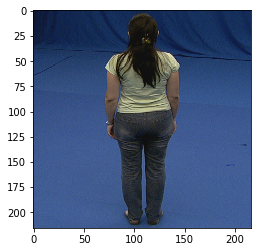

2


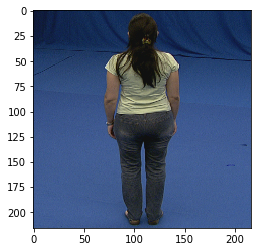

3


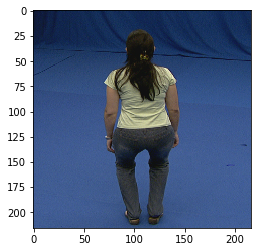

4


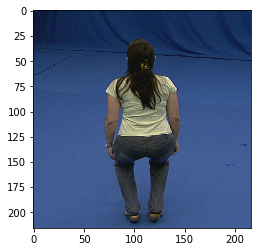

5


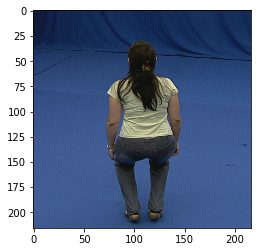

6


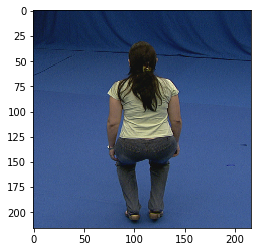

7


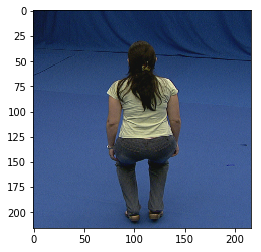

8


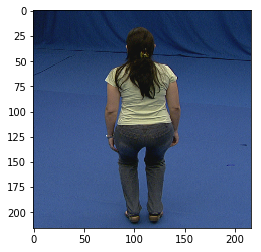

9


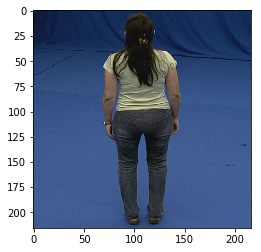

10


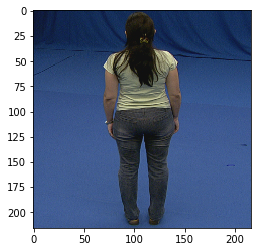

11


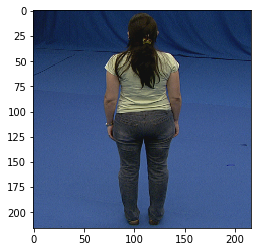

F:\optical_flow\Sit - stand up\\Woman2\006
len: 125
step-size: 11
1


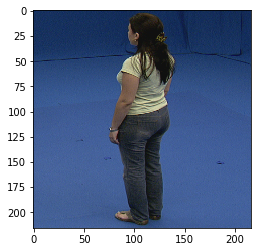

2


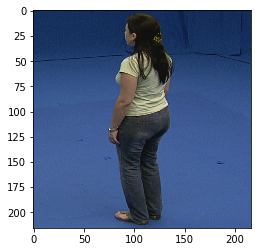

3


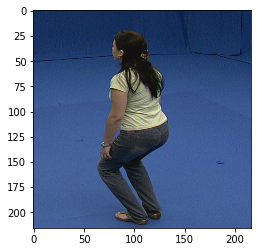

4


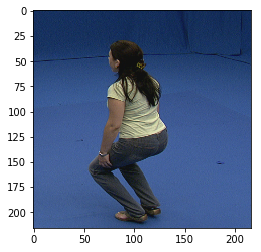

5


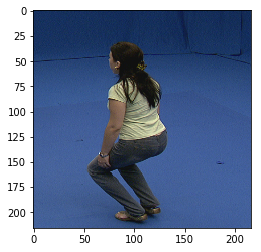

6


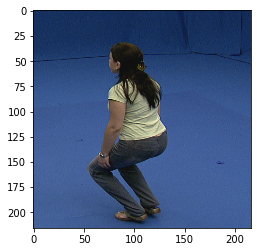

7


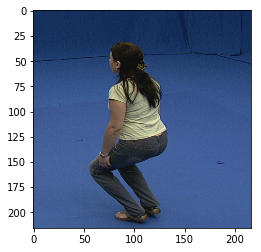

8


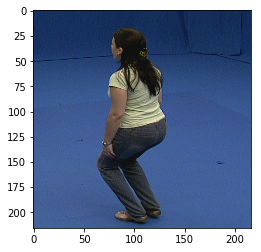

9


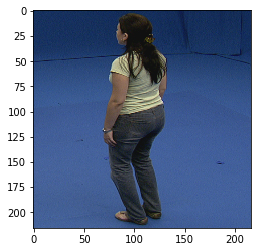

10


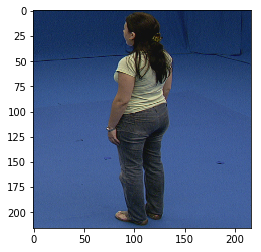

11


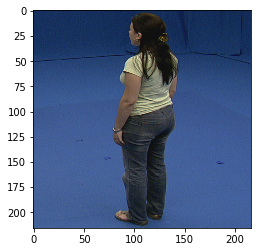

F:\optical_flow\Sit - stand up\\Woman2\007
len: 125
step-size: 11
1


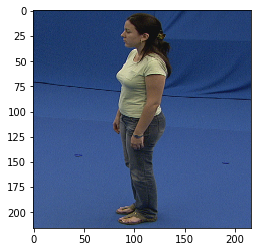

2


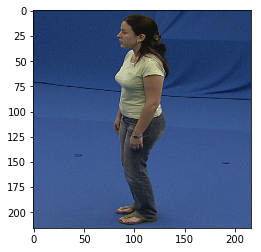

3


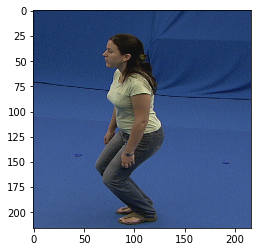

4


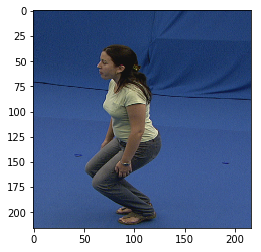

5


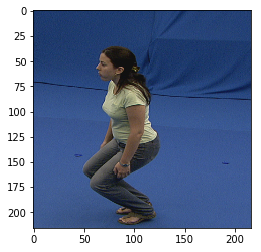

6


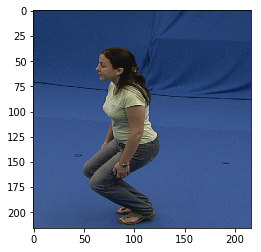

7


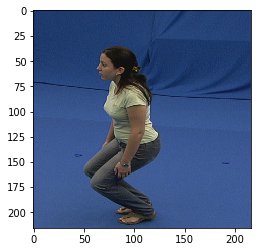

8


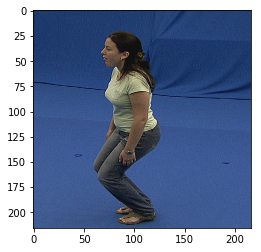

9


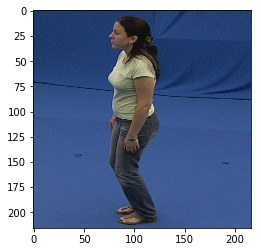

10


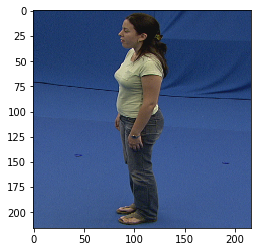

11


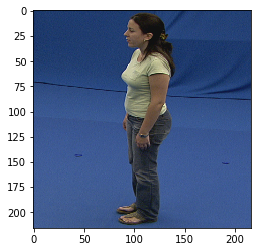

In [82]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

    
dest_dir = r'''F:\optical_flow'''
for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(0,8):
        imagelist = []
        
        file = r'''F:\dataset(cleaned)\Sit - stand up\\'''+ str(person) + r'''\00''' + str(i) + r'''\\*.png'''
        #imgfile = r'''F:\dataset(cleaned)\Run\\'''+ str(person) + r'''\00''' + str(i) + r'''\\'''
        mypath = dest_dir + file[19:-7]
        #mypath = dest_dir + imgfile[19:-2]
        print(mypath)

        
        if not os.path.isdir(mypath):
            os.makedirs(mypath)
            #frames = []
        

        for filename in sorted(glob.glob(file),key=numericalSort): 
            #print(filename)
            #print(sorted(glob.glob(file), key=lambda name: int(name[-7:4])))
            imagelist.append(filename)
        #frames = imagelist
        process_image(imagelist)
        #print(stacked_flow)
 

In [20]:
dest_dir = r'''F:\optical'''
for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(0,8):
        imagelist = []
        file = r'''F:\optical_flow\Jump in place\\''' + str(person) + r'''\00''' + str(i) + r'''\\*.png'''
        mypath = dest_dir + file[15:-7]
        print(mypath)
    
        if not os.path.isdir(mypath[:-4]):
            os.makedirs(mypath[:-4])
            #frames = []
        for filename in glob.glob(file): 
            #print(filename)
            imagelist.append(filename)
        frames = imagelist
        #plt.imshow(cv2.imread(imagelist[5]))
        #plt.show()
        flow_stacked = optical_flow(frames)
        np.save(mypath , flow_stacked)
        #print(flow_stacked.shape)

F:\optical\Jump in place\\Man1\000
F:\optical\Jump in place\\Man1\001
F:\optical\Jump in place\\Man1\002
F:\optical\Jump in place\\Man1\003
F:\optical\Jump in place\\Man1\004
F:\optical\Jump in place\\Man1\005
F:\optical\Jump in place\\Man1\006
F:\optical\Jump in place\\Man1\007
F:\optical\Jump in place\\Man2\000
F:\optical\Jump in place\\Man2\001
F:\optical\Jump in place\\Man2\002
F:\optical\Jump in place\\Man2\003
F:\optical\Jump in place\\Man2\004
F:\optical\Jump in place\\Man2\005
F:\optical\Jump in place\\Man2\006
F:\optical\Jump in place\\Man2\007
F:\optical\Jump in place\\Man3\000
F:\optical\Jump in place\\Man3\001
F:\optical\Jump in place\\Man3\002
F:\optical\Jump in place\\Man3\003
F:\optical\Jump in place\\Man3\004
F:\optical\Jump in place\\Man3\005
F:\optical\Jump in place\\Man3\006
F:\optical\Jump in place\\Man3\007
F:\optical\Jump in place\\Man4\000
F:\optical\Jump in place\\Man4\001
F:\optical\Jump in place\\Man4\002
F:\optical\Jump in place\\Man4\003
F:\optical\Jump in p

In [90]:
import csv
import os.path
dest_dir = r'''F:\data'''

for datasets in ['Bend', 'Jump-in-place', 'Hand-wave', 'Run', 'Walk', 'Sit - stand up', 'Pull']:
  for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(0,8):
        
        imagelist = []
        file = r'''F:\optical_flow\\''' + str(datasets) + str('\\') + str(person) + r'''\00''' + str(i) + r'''\\*.png'''
        #file2 = file.split('\\')[2]
        #print(file2)
        myfile = (datasets+'_'+person+'_00'+str(i)+'.npy')
        print(myfile)
        #save_file_dir = dest_dir + str('\\') + myfile
        
        fname = myfile.split('.')[0]
        #print(fname)
        #mypath = dest_dir + file[15:-7]
        #print(mypath)

        if not os.path.isdir(dest_dir):
            os.makedirs(dest_dir)
            #frames = []
        for filename in glob.glob(file): 
            #print(filename)
            imagelist.append(filename)
        frames = imagelist
        #plt.imshow(cv2.imread(imagelist[5]))
        #plt.show()
        flow_stacked = optical_flow(frames)
        np.save(dest_dir + str('\\') + myfile , flow_stacked)


Bend_Man1_000.npy
Bend_Man1_001.npy
Bend_Man1_002.npy
Bend_Man1_003.npy
Bend_Man1_004.npy
Bend_Man1_005.npy
Bend_Man1_006.npy
Bend_Man1_007.npy
Bend_Man2_000.npy
Bend_Man2_001.npy
Bend_Man2_002.npy
Bend_Man2_003.npy
Bend_Man2_004.npy
Bend_Man2_005.npy
Bend_Man2_006.npy
Bend_Man2_007.npy
Bend_Man3_000.npy
Bend_Man3_001.npy
Bend_Man3_002.npy
Bend_Man3_003.npy
Bend_Man3_004.npy
Bend_Man3_005.npy
Bend_Man3_006.npy
Bend_Man3_007.npy
Bend_Man4_000.npy
Bend_Man4_001.npy
Bend_Man4_002.npy
Bend_Man4_003.npy
Bend_Man4_004.npy
Bend_Man4_005.npy
Bend_Man4_006.npy
Bend_Man4_007.npy
Bend_Man5_000.npy
Bend_Man5_001.npy
Bend_Man5_002.npy
Bend_Man5_003.npy
Bend_Man5_004.npy
Bend_Man5_005.npy
Bend_Man5_006.npy
Bend_Man5_007.npy
Bend_Man6_000.npy
Bend_Man6_001.npy
Bend_Man6_002.npy
Bend_Man6_003.npy
Bend_Man6_004.npy
Bend_Man6_005.npy
Bend_Man6_006.npy
Bend_Man6_007.npy
Bend_Woman1_000.npy
Bend_Woman1_001.npy
Bend_Woman1_002.npy
Bend_Woman1_003.npy
Bend_Woman1_004.npy
Bend_Woman1_005.npy
Bend_Woman1_006.

Sit - stand up_Woman1_004.npy
Sit - stand up_Woman1_005.npy
Sit - stand up_Woman1_006.npy
Sit - stand up_Woman1_007.npy
Sit - stand up_Woman2_000.npy
Sit - stand up_Woman2_001.npy
Sit - stand up_Woman2_002.npy
Sit - stand up_Woman2_003.npy
Sit - stand up_Woman2_004.npy
Sit - stand up_Woman2_005.npy
Sit - stand up_Woman2_006.npy
Sit - stand up_Woman2_007.npy
Pull_Man1_000.npy
Pull_Man1_001.npy
Pull_Man1_002.npy
Pull_Man1_003.npy
Pull_Man1_004.npy
Pull_Man1_005.npy
Pull_Man1_006.npy
Pull_Man1_007.npy
Pull_Man2_000.npy
Pull_Man2_001.npy
Pull_Man2_002.npy
Pull_Man2_003.npy
Pull_Man2_004.npy
Pull_Man2_005.npy
Pull_Man2_006.npy
Pull_Man2_007.npy
Pull_Man3_000.npy
Pull_Man3_001.npy
Pull_Man3_002.npy
Pull_Man3_003.npy
Pull_Man3_004.npy
Pull_Man3_005.npy
Pull_Man3_006.npy
Pull_Man3_007.npy
Pull_Man4_000.npy
Pull_Man4_001.npy
Pull_Man4_002.npy
Pull_Man4_003.npy
Pull_Man4_004.npy
Pull_Man4_005.npy
Pull_Man4_006.npy
Pull_Man4_007.npy
Pull_Man5_000.npy
Pull_Man5_001.npy
Pull_Man5_002.npy
Pull_Man5_

In [196]:
npy_file = r'''F:\data\\*.npy'''
file_name = 'F:\\datacombined.csv'

file_exists = os.path.isfile(file_name)
with open (file_name, 'a') as csvfile:
    headers = ['id', 'class']
    writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n',fieldnames=headers)
    if not file_exists:
        #print('yes')
        writer.writeheader()  # file doesn't exist yet, write a header
    for filename in glob.glob(npy_file): 
        fname = filename.split('\\')[2]
        f_class = fname.split('_')[0]
        
        



        writer.writerow({'id': fname, 'class': f_class})
        #print(fname)
    #print(filename)


In [2]:
import pandas as pd
file_name = 'F:\\datacombined.csv'

csv_file = pd.read_csv(file_name)
csv_file['label'] = pd.Categorical(csv_file['class'].astype(str)).codes 
csv_file

id class  label
0      Bend_Man1_000.npy  Bend      0
1      Bend_Man1_001.npy  Bend      0
2      Bend_Man1_002.npy  Bend      0
3      Bend_Man1_003.npy  Bend      0
4      Bend_Man1_004.npy  Bend      0
5      Bend_Man1_005.npy  Bend      0
6      Bend_Man1_006.npy  Bend      0
7      Bend_Man1_007.npy  Bend      0
8      Bend_Man2_000.npy  Bend      0
9      Bend_Man2_001.npy  Bend      0
10     Bend_Man2_002.npy  Bend      0
11     Bend_Man2_003.npy  Bend      0
12     Bend_Man2_004.npy  Bend      0
13     Bend_Man2_005.npy  Bend      0
14     Bend_Man2_006.npy  Bend      0
15     Bend_Man2_007.npy  Bend      0
16     Bend_Man3_000.npy  Bend      0
17     Bend_Man3_001.npy  Bend      0
18     Bend_Man3_002.npy  Bend      0
19     Bend_Man3_003.npy  Bend      0
20     Bend_Man3_004.npy  Bend      0
21     Bend_Man3_005.npy  Bend      0
22     Bend_Man3_006.npy  Bend      0
23     Bend_Man3_007.npy  Bend      0
24     Bend_Man4_000.npy  Bend      0
25     Bend_Man4_001.npy  Bend      0
26     Bend_Man4_002.npy  Bend      0
27     Bend_Man4_003.npy  Bend      0
28     Bend_Man4_004.npy  Bend      0
29     Bend_Man4_005.npy  Bend      0
..                   ...   ...    ...
418    Walk_Man5_002.npy  Walk      6
419    Walk_Man5_003.npy  Walk      6
420    Walk_Man5_004.npy  Walk      6
421    Walk_Man5_005.npy  Walk      6
422    Walk_Man5_006.npy  Walk      6
423    Walk_Man5_007.npy  Walk      6
424    Walk_Man6_000.npy  Walk      6
425    Walk_Man6_001.npy  Walk      6
426    Walk_Man6_002.npy  Walk      6
427    Walk_Man6_003.npy  Walk      6
428    Walk_Man6_004.npy  Walk      6
429    Walk_Man6_005.npy  Walk      6
430    Walk_Man6_006.npy  Walk      6
431    Walk_Man6_007.npy  Walk      6
432  Walk_Woman1_000.npy  Walk      6
433  Walk_Woman1_001.npy  Walk      6
434  Walk_Woman1_002.npy  Walk      6
435  Walk_Woman1_003.npy  Walk      6
436  Walk_Woman1_004.npy  Walk      6
437  Walk_Woman1_005.npy  Walk      6
438  Walk_Woman1_006.npy  Walk      6
439  Walk_Woman1_007.npy  Walk      6
440  Walk_Woman2_000.npy  Walk      6
441  Walk_Woman2_001.npy  Walk      6
442  Walk_Woman2_002.npy  Walk      6
443  Walk_Woman2_003.npy  Walk      6
444  Walk_Woman2_004.npy  Walk      6
445  Walk_Woman2_005.npy  Walk      6
446  Walk_Woman2_006.npy  Walk      6
447  Walk_Woman2_007.npy  Walk      6

[448 rows x 3 columns]

In [3]:
df = csv_file
sampled_action = []
nclasses = 7
for i in range(nclasses):
    df1=df.loc[df['label'] == (i)] #Extract ALL samples with class=1
    df2 = pd.concat(g.sample(12) for idx, g in df1.groupby('label')) #Extract 12 samples from df1
    sampled_action.append(df2)
sampled_action = pd.concat(sampled_action, axis=0)
#sampled_action
train = df[~df.isin(sampled_action)].dropna()
test = sampled_action.drop(['class','label'],axis=1)
del train['class']


In [4]:
train = train.sample(frac=1)
test = test.sample(frac=1)

train.to_csv('F:\\train.csv')
test.to_csv('F:\\test.csv')

In [ ]:
appended_data.append(data)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data, axis=1)

ValueError: expr must be a string to be evaluated, <class 'bool'> given

In [11]:
import csv
import os.path
dest_dir = r'''F:\test'''

for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(7,8):
        
        imagelist = []
        file = r'''F:\optical_flow\Jump-in-place\\''' + str(person) + r'''\00''' + str(i) + r'''\\*.png'''
        file2 = file.split('\\')[2]
        myfile = (file2+'_'+person+'_00'+str(i)+'.npy')
        print(myfile)
        save_file_dir = dest_dir + str('\\') + myfile
        
        fname = myfile.split('.')[0]
        #print(fname)
        #mypath = dest_dir + file[15:-7]
        #print(mypath)

        if not os.path.isdir(dest_dir):
            os.makedirs(dest_dir)
            #frames = []
        for filename in glob.glob(file): 
            #print(filename)
            imagelist.append(filename)
        frames = imagelist
        #plt.imshow(cv2.imread(imagelist[5]))
        #plt.show()
        flow_stacked = optical_flow(frames)
        np.save(dest_dir + str('\\') + myfile , flow_stacked)


Jump-in-place_Man1_007.npy
Jump-in-place_Man2_007.npy
Jump-in-place_Man3_007.npy
Jump-in-place_Man4_007.npy
Jump-in-place_Man5_007.npy
Jump-in-place_Man6_007.npy
Jump-in-place_Woman1_007.npy
Jump-in-place_Woman2_007.npy


In [72]:
import csv
import os.path
dest_dir = r'''F:\\'''

for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(0,7):
        
        imagelist = []
        file = r'''F:\optical_flow\Hand-wave\\''' + str(person) + r'''\00''' + str(i) + r'''\\*.npy'''
        file2 = file.split('\\')[2]
        myfile = (file2+'_'+person+'_00'+str(i)+'.npy')
        print(myfile)
        fname = myfile.split('.')[0]
        if file2 == 'Jump-in-place':
            label = 0
        elif file2 == 'Hand-wave':
            label = 1
         
        filename = 'F://trainlabel.csv'

        file_exists = os.path.isfile(filename)

        with open (filename, 'a') as csvfile:
            headers = ['id', 'label']
            writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n',fieldnames=headers)

            if not file_exists:
                #print('yes')
                writer.writeheader()  # file doesn't exist yet, write a header

            writer.writerow({'id': fname, 'label': label})

Hand-wave_Man1_000.npy
Hand-wave_Man1_001.npy
Hand-wave_Man1_002.npy
Hand-wave_Man1_003.npy
Hand-wave_Man1_004.npy
Hand-wave_Man1_005.npy
Hand-wave_Man1_006.npy
Hand-wave_Man2_000.npy
Hand-wave_Man2_001.npy
Hand-wave_Man2_002.npy
Hand-wave_Man2_003.npy
Hand-wave_Man2_004.npy
Hand-wave_Man2_005.npy
Hand-wave_Man2_006.npy
Hand-wave_Man3_000.npy
Hand-wave_Man3_001.npy
Hand-wave_Man3_002.npy
Hand-wave_Man3_003.npy
Hand-wave_Man3_004.npy
Hand-wave_Man3_005.npy
Hand-wave_Man3_006.npy
Hand-wave_Man4_000.npy
Hand-wave_Man4_001.npy
Hand-wave_Man4_002.npy
Hand-wave_Man4_003.npy
Hand-wave_Man4_004.npy
Hand-wave_Man4_005.npy
Hand-wave_Man4_006.npy
Hand-wave_Man5_000.npy
Hand-wave_Man5_001.npy
Hand-wave_Man5_002.npy
Hand-wave_Man5_003.npy
Hand-wave_Man5_004.npy
Hand-wave_Man5_005.npy
Hand-wave_Man5_006.npy
Hand-wave_Man6_000.npy
Hand-wave_Man6_001.npy
Hand-wave_Man6_002.npy
Hand-wave_Man6_003.npy
Hand-wave_Man6_004.npy
Hand-wave_Man6_005.npy
Hand-wave_Man6_006.npy
Hand-wave_Woman1_000.npy
Hand-wave

In [12]:
import csv
import os.path
dest_dir = r'''F:\\'''

for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(7,8):
        
        imagelist = []
        file = r'''F:\optical_flow\Jump-in-place\\''' + str(person) + r'''\00''' + str(i) + r'''\\*.npy'''
        file2 = file.split('\\')[2]
        myfile = (file2+'_'+person+'_00'+str(i)+'.npy')
        print(myfile)
        fname = myfile.split('.')[0]
        if file2 == 'Jump-in-place':
            label = 0
        elif file2 == 'Hand-wave':
            label = 1
         
        filename = 'F://testlabel.csv'

        file_exists = os.path.isfile(filename)

        with open (filename, 'a') as csvfile:
            headers = ['id']
            writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n',fieldnames=headers)

            if not file_exists:
                #print('yes')
                writer.writeheader()  # file doesn't exist yet, write a header

            writer.writerow({'id': fname})

Jump-in-place_Man1_007.npy
Jump-in-place_Man2_007.npy
Jump-in-place_Man3_007.npy
Jump-in-place_Man4_007.npy
Jump-in-place_Man5_007.npy
Jump-in-place_Man6_007.npy
Jump-in-place_Woman1_007.npy
Jump-in-place_Woman2_007.npy


In [8]:
for person in ['Man1','Man2','Man3','Man4','Man5','Man6','Woman1','Woman2']:
    for i in range(8):
        file = r'''F:\optical\Hand-wave\\''' + str(person) + r'''\00''' + str(i) + r'''.npy'''
        opt = np.load(file)
        for i in range(18):
            b = np.transpose(opt[:,:,i], axes=[0,1])
            #print (b.shape) # (480L, 640L, 3L)
            cv2.imshow("horz",b.astype(dtype='uint8'))
            cv2.waitKey(0)

In [176]:
flow_stack.shape


(216, 216, 18)

In [78]:
file_name = r'''F:\train\\Hand-wave_Man1_004.npy''' 
np_file = np.load(file_name)
print(np_file.shape)
npfile =  np_file[:, ::-1]
print(npfile.shape)
for i in range(2):
    b1 = np.transpose(np_file[:,:,i], axes=[0,1])
    print (b1.shape) # (480L, 640L, 3L)
    cv2.imshow("orig",b1.astype(dtype='uint8'))
    cv2.waitKey(0)
    b2 = np.transpose(npfile[:,:,i], axes=[0,1])
    print (b2.shape) # (480L, 640L, 3L)
    cv2.imshow("flip",b2.astype(dtype='uint8'))
    cv2.waitKey(0)
    
    





(216, 216, 20)
(216, 216, 20)
(216, 216)
(216, 216)
(216, 216)
(216, 216)


In [177]:
import numpy as np
# (216,216,28)
a = np.random.rand(3,1,480,640)
for i in range(18):
    b = np.transpose(flow_stack[:,:,i], axes=[0,1])
    print (b.shape) # (480L, 640L, 3L)
    cv2.imshow("horz",b.astype(dtype='uint8'))
    cv2.waitKey(0)

(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)
(216, 216)


In [33]:
s = r'''F:\dataset(cleaned)\Jump\Man1\000\\*.png'''
s[19:-7]

'\\Jump\\Man1\\000'

1


C:\Users\Raj Sahu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


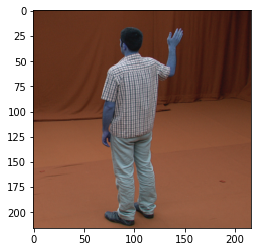

2


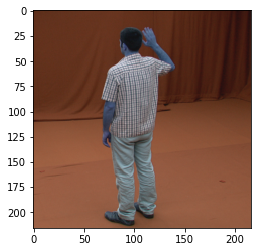

3


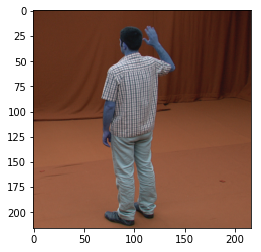

4


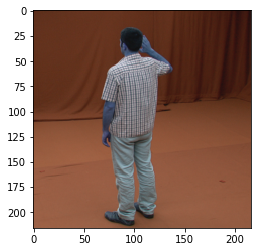

5


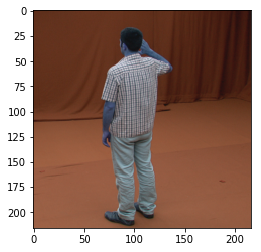

6


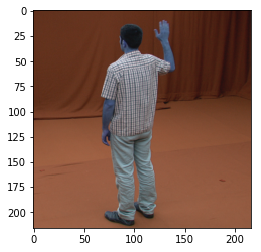

7


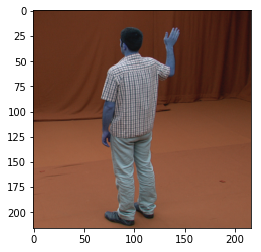

8


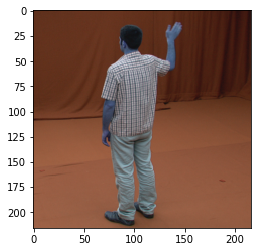

9


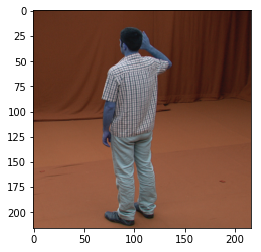

10


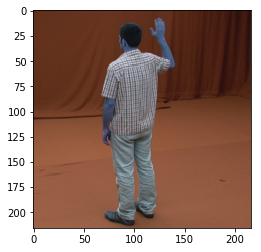

11


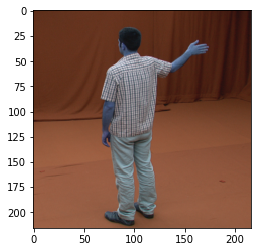

12


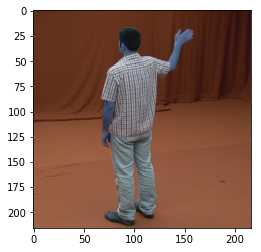

13


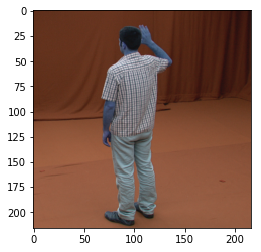

14


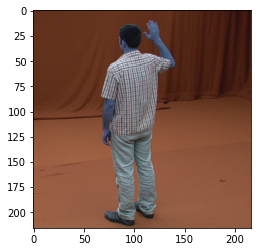

15


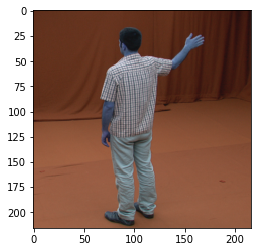

(216, 216)
(216, 216, 28)


In [121]:
file = r'''F:\dataset(cleaned)\Hand-wave\Man1\002\\*.png'''
dest_dir = r'''F:\processed'''
mypath = dest_dir + file[19:-7]
image_list = []
if not os.path.isdir(mypath):
    os.makedirs(mypath)
#frames = []
for filename in glob.glob(file): 
    #print(filename)
    image_list.append(filename)
process_image(image_list)

In [120]:
#global f
def process_image(image_list):
    global frame2
    global f
    global frames
    global images
    frames = []
    l = len(image_list)
    #print("len:",l)
    n = l //15
    #print("n:",n)
    s=0
    for i in range(0,l,n):
        #print('i:',i)
        
        if s==15:
            break
        s+=1
        print(s)
        image = cv2.imread(image_list[i]) #.astype(dtype='float32')    
        image = scipy.misc.imresize(image, (216,216, 3)).astype(dtype='float32')
        image /= 255 
        
        fig = plt.figure()
        plt.imsave(os.path.join(mypath+str('//'), str(i)+'.png'), image.astype('float64'), vmin=0, vmax=255)
        plt.close(fig)

        
        #cv2.imwrite(os.path.join(mypath+str('//'), str(i)+'.png'), image.astype('uint8'))
        #cv2.waitKey(0)
        #print(image)
        
        plt.imshow(image)
        plt.show()
        
        frames.append(image.astype(dtype='float32'))
        
        frame2 = np.stack(frames)
    f = stack_optical_flow(frame2)
    print(f.shape)
    #print(frame2)
        #plt.imshow(image)
        #plt.show()
        
    
    
    

[array([[[0.3529412 , 0.16470589, 0.09803922],
         [0.3529412 , 0.1764706 , 0.09411765],
         [0.3529412 , 0.1764706 , 0.10196079],
         ...,
         [0.19607843, 0.07058824, 0.05490196],
         [0.14509805, 0.0627451 , 0.05882353],
         [0.14509805, 0.0627451 , 0.05882353]],
 
        [[0.36078432, 0.1764706 , 0.09411765],
         [0.35686275, 0.17254902, 0.09411765],
         [0.36078432, 0.1764706 , 0.09803922],
         ...,
         [0.1882353 , 0.06666667, 0.05882353],
         [0.14901961, 0.0627451 , 0.05882353],
         [0.15686275, 0.06666667, 0.05882353]],
 
        [[0.3529412 , 0.17254902, 0.10196079],
         [0.35686275, 0.1764706 , 0.09803922],
         [0.36078432, 0.18039216, 0.10196079],
         ...,
         [0.17254902, 0.06666667, 0.05490196],
         [0.13333334, 0.0627451 , 0.05882353],
         [0.14901961, 0.07058824, 0.05882353]],
 
        ...,
 
        [[0.6039216 , 0.38039216, 0.27058825],
         [0.60784316, 0.3764706 , 0.26666

(216, 216)


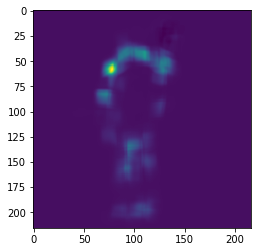

In [117]:
import numpy as np
# (216,216,28)
a = np.random.rand(3,1,480,640)
b = np.transpose(f[:,:,11], axes=[0,1])
print (b.shape) # (480L, 640L, 3L)
cv2.imshow('yo',b)
cv2.waitKey(0)
plt.imshow(b.astype(dtype='float32'))
plt.show()

(216, 216, 3)


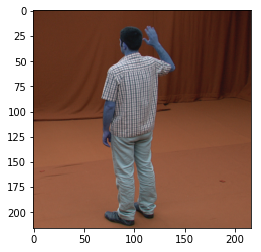

In [107]:
import numpy as np
# (216,216,28)
a = np.random.rand(3,1,480,640)
b = np.transpose(frame2[2,:,:,:], axes=[0,1,2])
print (b.shape) # (480L, 640L, 3L)
plt.imshow(b.astype(dtype='float32'))
plt.show()

In [110]:
frame2.shape

(15, 216, 216, 3)

NameError: name 'images' is not defined

In [112]:
def _calc_optical_flow(prev, next_):
    flow = cv2.calcOpticalFlowFarneback(prev, next_, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=3,
                                        poly_n=5, poly_sigma=1.2, flags=0)
    return flow

In [111]:
def stack_optical_flow(frames, mean_sub=False):
    if frames.dtype != np.float32:
        frames = frames.astype(np.float32)
        #warnings.warn('Warning! The data type has been changed to np.float32 for graylevel conversion...')
    frame_shape = frames.shape[1:-1]  # e.g. frames.shape is (10, 216, 216, 3)
    print(frame_shape)
    num_sequences = frames.shape[0]
    output_shape = frame_shape + (2 * (num_sequences - 1),)  # stacked_optical_flow.shape is (216, 216, 18)
    flows = np.ndarray(shape=output_shape)

    for i in range(num_sequences - 1):
        prev_frame = frames[i]
        next_frame = frames[i + 1]
        prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
        next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
        flow = _calc_optical_flow(prev_gray, next_gray)
        flows[:, :, 2 * i:2 * i + 2] = flow

    if mean_sub:
        flows_x = flows[:, :, 0:2 * (num_sequences - 1):2]
        flows_y = flows[:, :, 1:2 * (num_sequences - 1):2]
        #mean_x = np.mean(flows_x, axis=2)
        #mean_y = np.mean(flows_y, axis=2)
        #for i in range(2 * (num_sequences - 1)):
        #    flows[:, :, i] = flows[:, :, i] - mean_x if i % 2 == 0 else flows[:, :, i] - mean_y


    return flows

In [ ]:
def preprocess_listtxt(list_dir, index_dir, txt_dir, dest_dir):
    class_dict = dict()
    with open(index_dir) as fo:
        for line in fo:
            class_index, class_name = line.split()
            class_dict[class_name] = class_index

    with open(txt_dir, 'r') as fo:
        lines = [line for line in fo]

    with open(dest_dir, 'w') as fo:
        for line in lines:
            class_name = os.path.dirname(line)
            class_index = class_dict[class_name]
            fo.write(line.rstrip('\n') + ' {}\n'.format(class_index))


def preprocess_flow_image(flow_dir):
    videos = os.listdir(flow_dir)
    for video in videos:
        video_dir = os.path.join(flow_dir, video)
        flow_images = os.listdir(video_dir)
        for flow_image in flow_images:
            flow_image_dir = os.path.join(video_dir, flow_image)
            img = scipy.misc.imread(flow_image_dir)
            if np.max(img) < 140 and np.min(img) > 120:
                print('remove', flow_image_dir)
                os.remove(flow_image_dir)


def regenerate_data(data_dir, list_dir, UCF_dir):
    start_time = time.time()
    sequence_length = 10
    image_size = (216, 216, 3)

    dest_dir = os.path.join(data_dir, 'UCF-Preprocessed-OF')
    # generate sequence for optical flow
    preprocessing(list_dir, UCF_dir, dest_dir, sequence_length, image_size, overwrite=True, normalization=False,
                  mean_subtraction=False, horizontal_flip=False, random_crop=True, consistent=True, continuous_seq=True)

    # compute optical flow data
    src_dir = '/home/changan/ActionRecognition/data/UCF-Preprocessed-OF'
    dest_dir = '/home/changan/ActionRecognition/data/OF_data'
    optical_flow_prep(src_dir, dest_dir, mean_sub=True, overwrite=True)

    elapsed_time = time.time() - start_time
    print('Regenerating data takes:', int(elapsed_time / 60), 'minutes')

if __name__ == '__main__':
    '''
        extract frames from videos as npy files
    '''
    sequence_length = 10
    image_size = (216, 216, 3)

    data_dir = '/home/changan/ActionRecognition/data'
    list_dir = os.path.join(data_dir, 'ucfTrainTestlist')
    UCF_dir = os.path.join(data_dir, 'UCF-101')
    frames_dir = os.path.join(data_dir, 'frames/mean.npy')

    # add index number to testlist file
    # index_dir = os.path.join(list_dir, 'classInd.txt')
    # txt_dir = os.path.join(list_dir, 'testlist01.txt')
    # dest_dir = os.path.join(list_dir, 'testlist.txt')
    # preprocess_listtxt(list_dir, index_dir, txt_dir, dest_dir)

    # generate sequence for optical flow
    # dest_dir = os.path.join(data_dir, 'UCF-Preprocessed-OF')
    # preprocessing(list_dir, UCF_dir, dest_dir, sequence_length, image_size, overwrite=True, normalization=False,
    #               mean_subtraction=False, horizontal_flip=False, random_crop=False, consistent=True, continuous_seq=True)

    # calculate RGB mean for LRCN data
    # RGB_mean = calc_mean(UCF_dir, image_size)
    # np.save(frames_dir, RGB_mean)

    # remove useless optical flow data
    # flow_dir = os.path.join(data_dir, 'flow_images')
    # preprocess_flow_image(flow_dir)

    # generate sequence and optical flow data
    regenerate_data(data_dir, list_dir, UCF_dir)

In [ ]:
# down sample image resolution to 216*216, and make sequence length 10
def process_clip(src_dir, dst_dir, seq_len, img_size, mean=None, normalization=True,
                 horizontal_flip=True, random_crop=True, consistent=True, continuous_seq=False):
    all_frames = []
    cap = cv2.VideoCapture(src_dir)
    while cap.isOpened():
        succ, frame = cap.read()
        if not succ:
            break
        # append frame that is not all zeros
        if frame.any():
            all_frames.append(frame)
    # save all frames
    if seq_len is None:
        all_frames = np.stack(all_frames, axis=0)
        dst_dir = os.path.splitext(dst_dir)[0] + '.npy'
        np.save(dst_dir, all_frames)
    else:
        clip_length = len(all_frames)
        if clip_length <= 20:
            print(src_dir, ' has no enough frames')
        step_size = int(clip_length / (seq_len + 1))
        frame_sequence = []
        # select random first frame index for continuous sequence
        if continuous_seq:
            start_index = random.randrange(clip_length-seq_len)
        # choose whether to flip or not for all frames
        if not horizontal_flip:
            flip = False
        elif horizontal_flip and consistent:
            flip = random.randrange(2) == 1
        if not random_crop:
            x, y = None, None
        xy_set = False
        for i in range(seq_len):
            if continuous_seq:
                index = start_index + i
            else:
                index = i*step_size + random.randrange(step_size)
            frame = all_frames[index]
            # compute flip for each frame
            if horizontal_flip and not consistent:
                flip = random.randrange(2) == 1
            if random_crop and consistent and not xy_set:
                x = random.randrange(frame.shape[0]-img_size[0])
                y = random.randrange(frame.shape[1]-img_size[1])
                xy_set = True
            elif random_crop and not consistent:
                x = random.randrange(frame.shape[0]-img_size[0])
                y = random.randrange(frame.shape[1]-img_size[1])
            frame = process_frame(frame, img_size, x, y, mean=mean, normalization=normalization,
                                  flip=flip, random_crop=random_crop)
            frame_sequence.append(frame)
        frame_sequence = np.stack(frame_sequence, axis=0)
        dst_dir = os.path.splitext(dst_dir)[0]+'.npy'
        np.save(dst_dir, frame_sequence)

    cap.release()

In [ ]:
def calc_mean(UCF_dir, img_size):
    frames = []
    print('Calculating RGB mean ...')
    for dirpath, dirnames, filenames in os.walk(UCF_dir):
        for filename in filenames:
            path = os.path.join(dirpath, filename)
            if os.path.exists(path):
                cap = cv2.VideoCapture(path)
                if cap.isOpened():
                    ret, frame = cap.read()
                    # successful read and frame should not be all zeros
                    if ret and frame.any():
                        if frame.shape != (240, 320, 3):
                            frame = scipy.misc.imresize(frame, (240, 320, 3))
                        frames.append(frame)
                cap.release()
    frames = np.stack(frames)
    mean = frames.mean(axis=0, dtype='int64')
    mean = scipy.misc.imresize(mean, img_size)
    print('RGB mean is calculated over', len(frames), 'video frames')
    return mean


In [37]:
import scipy

In [131]:
def calc_mean(UCF_dir,img_size):
    frames = []
    for filename in glob.glob(file): 
        frames.append(cv2.imread(filename))
    frames = np.stack(frames)
    mean = frames.mean(axis=0,dtype='int64')
    
    mean = scipy.misc.imresize(mean,img_size)
    print('RGB mean is calculated over', len(frames), 'video frames')
    return mean
    
    

In [132]:
img_size = (450,450,3)

In [133]:
mean = calc_mean(UCF_dir, img_size).astype(dtype='int64')
print(mean)
np.save(os.path.join(dest_dir, 'mean.npy'), mean)

RGB mean is calculated over 82 video frames
[[[119  52  14]
  [119  52  14]
  [118  50  15]
  ...
  [ 85  28   1]
  [ 85  28   1]
  [ 85  28   1]]

 [[119  52  14]
  [118  52  14]
  [118  50  14]
  ...
  [ 87  28   1]
  [ 85  28   1]
  [ 85  28   1]]

 [[119  52  14]
  [119  52  14]
  [118  50  14]
  ...
  [ 87  28   1]
  [ 87  28   1]
  [ 85  28   1]]

 ...

 [[177 101  62]
  [178 101  62]
  [178 101  62]
  ...
  [179 104  63]
  [178 104  63]
  [179 104  63]]

 [[177  99  62]
  [178 101  62]
  [178 101  62]
  ...
  [179 104  63]
  [179 104  63]
  [179 104  63]]

 [[178 101  62]
  [178 101  62]
  [178 101  62]
  ...
  [179 104  63]
  [179 104  63]
  [179 104  63]]]


C:\Users\Raj Sahu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [127]:
file = r'''F:\dataset(cleaned)\Jump\Man1\000\\*.png'''
dest_dir = r'''F:\dataset(cleaned)\try'''
for filename in glob.glob(file): 
    image_list.append(filename)

In [128]:
mean[900]

IndexError: index 900 is out of bounds for axis 0 with size 450

In [134]:
frame = im1.astype(dtype='float64')
#frame -= mean
frame /= 255


In [135]:
frame.shape

(450, 450, 3)

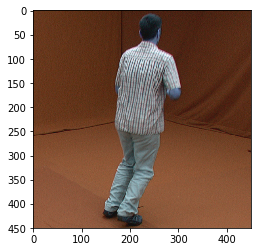

In [136]:
plt.imshow(frame)
#plt.imshow(frame)
plt.show()

In [118]:
im1 = image_list[10]
#im1 = cv2.imread(im1)
UCF_dir = file

In [126]:
im2 = np.mean(image_list, axis=0)
im2

ValueError: setting an array element with a sequence

In [ ]:
def preprocessing(dest_dir,myimg, seq_len, img_size, normalization=True,
                  mean_subtraction=True):


    if mean_subtraction:
        mean = calc_mean(myimg, img_size).astype(dtype='float16')
        np.save(os.path.join(dest_dir, 'mean.npy'), mean)
    else:
        mean = None

    print('Preprocessing UCF data ...')
     process_clip(src_dir, dst_dir, seq_len, img_size, mean=mean, normalization=normalization, horizontal_flip=horizontal_flip,
                         random_crop=random_crop, consistent=consistent, continuous_seq=continuous_seq)
    print('Preprocessing done ...')

In [ ]:
def process_frame(frame, img_size, x, y, mean=None, normalization=True, flip=True, random_crop=True):
    if not random_crop:
        frame = scipy.misc.imresize(frame, img_size)
    else:
        frame = frame[x:x+img_size[0], y:y+img_size[1], :]
    # flip horizontally
    if flip:
        frame = frame[:, ::-1, :]
    frame = frame.astype(dtype='float16')
    if mean is not None:
        frame -= mean
    if normalization:
        frame /= 255

    return frame